# Decision Tree Model
---
Aim: This code focuses on implementing a decision tree model to naively predict the class of simulated particles.

This is a form of supervised learning.
In this model we used a one vs many approach.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
%config InlineBackend.figure_formats = ['svg']

Everything except `acceptance.pkl` and `total_dataset.pkl` are relevant to this exercise.

In [52]:
simulations = ['jpsi_mu_k_swap','psi2S','jpsi_mu_pi_swap', 'phimumu', 'pKmumu_piTop','signal','pKmumu_piTok_kTop','k_pi_swap','jpsi']

# Data Pre-processing

The data here has been preprocessed to combine all the dataframes into one big dataframe with an additional column, specifying the class.

In [53]:
df = pd.DataFrame()
f = open("ref.txt", "w")

for file in simulations:
    temp_df = pd.read_pickle('data/' + file + '.pkl')
    temp_df["class"] = file
    df = df.append(temp_df, ignore_index=True)

df.head()

,mu_plus_MC15TuneV1_ProbNNk,mu_plus_MC15TuneV1_ProbNNpi,mu_plus_MC15TuneV1_ProbNNmu,mu_plus_MC15TuneV1_ProbNNe,mu_plus_MC15TuneV1_ProbNNp,mu_plus_P,mu_plus_PT,mu_plus_ETA,mu_plus_PHI,mu_plus_PE,...,B0_OWNPV_Z,B0_FD_OWNPV,B0_ID,q2,phi,costhetal,costhetak,polarity,year,class
0,0.973928,0.003321,0.003178,1.569017e-06,0.029936,14543.49,1184.283004,3.199491,2.846102,14543.873799,...,-39.1316,9.512142,511,7.725413,2.170310,-0.984568,-0.350740,1,2016,jpsi_mu_k_swap
1,0.615791,0.045364,0.213335,8.799382e-08,0.002344,25857.66,1817.817081,3.346880,-1.191892,25857.875867,...,57.3986,7.159271,-511,12.714047,-1.152073,-0.925117,0.384775,1,2016,jpsi_mu_k_swap
2,0.978006,0.002302,0.004772,1.491569e-06,0.003949,14040.03,1082.531306,3.254268,2.481684,14040.427561,...,-12.3357,6.010502,511,8.816600,2.810081,-0.988628,-0.234586,1,2016,jpsi_mu_k_swap
3,0.975666,0.012426,0.019173,1.230290e-04,0.636164,8185.07,1635.375513,2.293454,1.800428,8185.751926,...,86.6346,6.876421,-511,9.897957,-2.225030,-0.960749,-0.131841,1,2016,jpsi_mu_k_swap
4,0.979261,0.022059,0.012731,5.174431e-06,0.488873,8903.09,1414.075757,2.526702,1.014898,8903.716934,...,33.1838,11.316829,511,12.692251,-0.991083,-0.990580,0.500036,1,2016,jpsi_mu_k_swap


In [54]:
df.describe()

,mu_plus_MC15TuneV1_ProbNNk,mu_plus_MC15TuneV1_ProbNNpi,mu_plus_MC15TuneV1_ProbNNmu,mu_plus_MC15TuneV1_ProbNNe,mu_plus_MC15TuneV1_ProbNNp,mu_plus_P,mu_plus_PT,mu_plus_ETA,mu_plus_PHI,mu_plus_PE,...,B0_OWNPV_X,B0_OWNPV_Y,B0_OWNPV_Z,B0_FD_OWNPV,B0_ID,q2,phi,costhetal,costhetak,polarity
count,1.430536e+06,1.430536e+06,1.430536e+06,1.430536e+06,1.430536e+06,1.430536e+06,1.430536e+06,1.430536e+06,1.430536e+06,1.430536e+06,...,1.430536e+06,1.430536e+06,1.430536e+06,1.430536e+06,1.430536e+06,1.430536e+06,1.430536e+06,1.430536e+06,1.430536e+06,1.430536e+06
mean,1.543841e-02,9.973894e-02,9.727155e-01,1.819605e-04,5.120067e-03,4.577415e+04,3.533013e+03,3.105180e+00,6.227533e-03,4.577438e+04,...,8.396711e-01,-1.798027e-01,-2.935651e+00,1.637727e+01,1.046622e+00,1.009600e+01,1.562265e-02,1.485039e-02,-1.738418e-01,6.477292e-01
std,6.402191e-02,1.439933e-01,8.190330e-02,5.362566e-03,3.417842e-02,4.433915e+04,2.609625e+03,6.291147e-01,1.807641e+00,4.433903e+04,...,3.243812e-02,3.231536e-02,4.076783e+01,1.781503e+01,5.109991e+02,3.285039e+00,1.802295e+00,5.477385e-01,5.750694e-01,7.618709e-01
min,1.328284e-06,9.338385e-08,1.442755e-05,2.212421e-13,5.037283e-10,3.001500e+03,1.000001e+03,1.595518e+00,-3.141591e+00,3.003359e+03,...,5.411000e-01,-3.793000e-01,-1.809695e+02,5.950991e-01,-5.110000e+02,4.496660e-02,-3.141593e+00,-9.999918e-01,-9.999986e-01,-1.000000e+00
25%,9.510988e-05,1.371967e-02,9.824122e-01,9.252994e-07,1.191120e-06,1.815260e+04,1.853904e+03,2.619548e+00,-1.552733e+00,1.815290e+04,...,8.180000e-01,-2.014000e-01,-3.034943e+01,5.975293e+00,-5.110000e+02,9.518330e+00,-1.522296e+00,-4.358477e-01,-6.816766e-01,1.000000e+00
50%,4.933332e-04,4.159524e-02,9.949145e-01,2.550377e-06,1.361527e-05,3.235918e+04,2.781446e+03,3.070735e+00,1.769432e-02,3.235936e+04,...,8.397000e-01,-1.798000e-01,-2.986300e+00,1.083816e+01,5.110000e+02,9.620855e+00,-2.394114e-03,1.943034e-02,-2.666912e-01,1.000000e+00
75%,5.341427e-03,1.177767e-01,9.985228e-01,7.403882e-06,6.218406e-04,5.746017e+04,4.328204e+03,3.555219e+00,1.567700e+00,5.746026e+04,...,8.614000e-01,-1.582000e-01,2.446385e+01,2.002281e+01,5.110000e+02,1.204746e+01,1.585419e+00,4.702883e-01,3.000649e-01,1.000000e+00
max,9.991404e-01,9.954261e-01,9.999995e-01,9.993312e-01,9.908569e-01,1.696015e+06,7.441134e+04,5.112117e+00,3.141572e+00,1.696015e+06,...,1.034100e+00,5.900000e-03,1.740547e+02,5.034017e+02,5.110000e+02,2.052086e+01,3.141592e+00,9.999996e-01,9.999988e-01,1.000000e+00


# Model Training
Here a Machine Learning model is trained with features in `cols_to_use`, which excludes meaningless columns such as `year`.

In [6]:
cols_to_use = ['mu_plus_MC15TuneV1_ProbNNk', 'mu_plus_MC15TuneV1_ProbNNpi',
       'mu_plus_MC15TuneV1_ProbNNmu', 'mu_plus_MC15TuneV1_ProbNNe',
       'mu_plus_MC15TuneV1_ProbNNp', 'mu_plus_P', 'mu_plus_PT', 'mu_plus_ETA',
       'mu_plus_PHI', 'mu_plus_PE', 'mu_plus_PX', 'mu_plus_PY', 'mu_plus_PZ',
       'mu_plus_IPCHI2_OWNPV', 'mu_minus_MC15TuneV1_ProbNNk',
       'mu_minus_MC15TuneV1_ProbNNpi', 'mu_minus_MC15TuneV1_ProbNNmu',
       'mu_minus_MC15TuneV1_ProbNNe', 'mu_minus_MC15TuneV1_ProbNNp',
       'mu_minus_P', 'mu_minus_PT', 'mu_minus_ETA', 'mu_minus_PHI',
       'mu_minus_PE', 'mu_minus_PX', 'mu_minus_PY', 'mu_minus_PZ',
       'mu_minus_IPCHI2_OWNPV', 'K_MC15TuneV1_ProbNNk',
       'K_MC15TuneV1_ProbNNpi', 'K_MC15TuneV1_ProbNNmu',
       'K_MC15TuneV1_ProbNNe', 'K_MC15TuneV1_ProbNNp', 'K_P', 'K_PT', 'K_ETA',
       'K_PHI', 'K_PE', 'K_PX', 'K_PY', 'K_PZ', 'K_IPCHI2_OWNPV',
       'Pi_MC15TuneV1_ProbNNk', 'Pi_MC15TuneV1_ProbNNpi',
       'Pi_MC15TuneV1_ProbNNmu', 'Pi_MC15TuneV1_ProbNNe',
       'Pi_MC15TuneV1_ProbNNp', 'Pi_P', 'Pi_PT', 'Pi_ETA', 'Pi_PHI', 'Pi_PE',
       'Pi_PX', 'Pi_PY', 'Pi_PZ', 'Pi_IPCHI2_OWNPV', 'B0_MM',
       'B0_ENDVERTEX_CHI2', 'B0_ENDVERTEX_NDOF', 'B0_FDCHI2_OWNPV', 'Kstar_MM',
       'Kstar_ENDVERTEX_CHI2', 'Kstar_ENDVERTEX_NDOF', 'Kstar_FDCHI2_OWNPV',
       'J_psi_MM', 'J_psi_ENDVERTEX_CHI2', 'J_psi_ENDVERTEX_NDOF',
       'J_psi_FDCHI2_OWNPV', 'B0_IPCHI2_OWNPV', 'B0_DIRA_OWNPV', 'B0_OWNPV_X',
       'B0_OWNPV_Y', 'B0_OWNPV_Z', 'B0_FD_OWNPV', 'B0_ID', 'q2', 'phi',
       'costhetal', 'costhetak', 'polarity']

The model was split into a training set and testing set to ensure validity of evaluation metrics. The splitting was stratified because of low event numbers in some datasets.

In [55]:
from sklearn.model_selection import train_test_split


# Feature dataset
X = df[cols_to_use]
# Labels/ class dataset
y = df.iloc[:, -1]

# Test train split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=20, stratify = y)

## Model cross-validation
Used to assess suitability of model by training and testing on the testing set using cross-validation.

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier()

In [69]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix 

# Only predict using a small subset of the data first
n = len(X_train)
y_train_pred = cross_val_predict(forest, X_train[:n], y_train[:n], cv=3)

Took 46 minutes to train on the data.

In [100]:
cm = confusion_matrix(y_train[:n], y_train_pred, labels = simulations)

<AxesSubplot:>

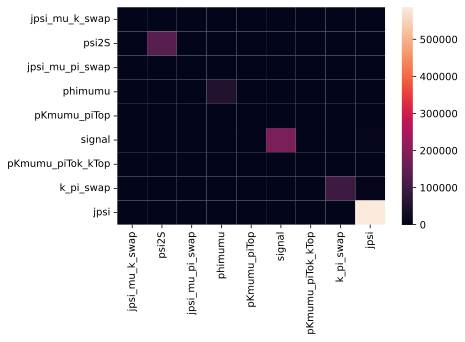

In [101]:
sns.heatmap(cm, yticklabels = simulations, xticklabels = simulations)


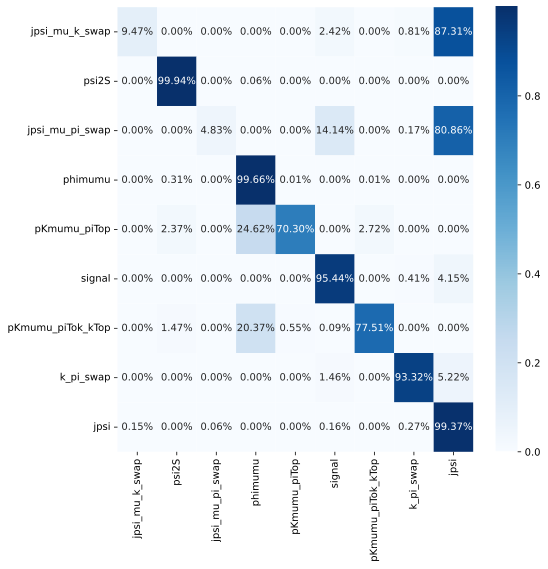

In [122]:
plt.figure(figsize=(8,8))
sns.heatmap(cm/cm.sum(keepdims=True, axis=1), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=simulations, yticklabels=simulations)

plt.tight_layout()

This part actually trains the model using the `.fit` command.

In [124]:
import pickle
forest.fit(X_train, y_train)
pickle.dump(forest, open('saved_models/rf.pkl', 'wb'))

In [112]:
cm.sum(axis=1, keepdims=True)

array([[  1489],
       [135807],
       [   580],
       [ 51239],
       [   845],
       [191806],
       [  1085],
       [ 99969],
       [590082]])

In [127]:
y_valid_pred = forest.predict(X_valid)

In [130]:
cm2 = confusion_matrix(y_valid, y_test_pred, labels = simulations)

## Results
A confusion matrix has been plot to see which events were most mis-classified.

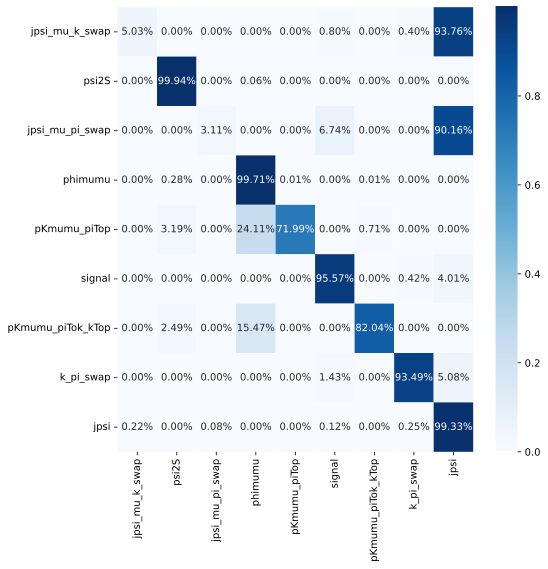

In [131]:
plt.figure(figsize=(8,8))
sns.heatmap(cm2/cm2.sum(keepdims=True, axis=1), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=simulations, yticklabels=simulations)

plt.tight_layout()

# Load Model and act on total_dataset

This part uses the saved model to act on the total_dataset and filters it to create a dataframe of 'wanted' events.

We have to be careful as
* There might be other combinitorial background in the total_dataset which was not taken account of
* Other physical effects might be at play

But it would be useful for the fitting group to try their methods on this semi-filtered dataset now.

In [4]:
loaded = pickle.load(open('saved_models/rf.pkl', 'rb'))

In [7]:
total = pd.read_pickle('data/total_dataset.pkl')
X_real = total[cols_to_use]

In [9]:
y_predit_real = loaded.predict(X_real)

In [11]:
total['predictions'] = y_predit_real

In [14]:
filtered = total[total['predictions'] == 'signal']
len(total), len(filtered)

(498245, 36011)

In [17]:
len(filtered)/len(total) *100

7.227568766369958

In [18]:
pickle.dump(filtered, open('outputs/filt_frst_3101.pkl', 'wb'))